### Task 1: (Up-) Loading the Dataset and first Inspection

Load the appointments dataset from CSV (appointments_EDA.csv) and save the dataset as a Pandas DataFrame (variable name: df). Make sure Columns with DateTime information have the most appropriate format (datetime64).

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('appointments_EDA.csv')

# Check the first few rows of the dataframe to understand its structure
df.head()

,Noshow,SMSreceived,AppointmentID,PatientId,Age,GenderM,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Neighbourhood,ScheduledDay,AppointmentDay,TimeGapDays,prevNoshow,WeekDay
0,0,1,5217179,1423330000000,84.0,True,0,1,1,0,1,SANTO ANDRÉ,2016-01-05 11:53:44+00:00,2016-04-29 00:00:00+00:00,115,0,Friday
1,0,1,5218520,4616860000000,83.0,False,0,1,0,0,0,REDENÇÃO,2016-01-05 15:02:46+00:00,2016-04-29 00:00:00+00:00,115,0,Friday
2,0,1,5235449,55589600000000,74.0,False,0,0,0,0,0,MONTE BELO,2016-01-11 08:52:35+00:00,2016-04-29 00:00:00+00:00,109,0,Friday
3,0,1,5235643,91896900000000,70.0,False,0,1,1,0,0,GURIGICA,2016-01-11 09:08:10+00:00,2016-04-29 00:00:00+00:00,109,0,Friday
4,0,1,5235655,1534480000000,87.0,False,0,0,0,0,0,JUCUTUQUARA,2016-01-11 09:09:10+00:00,2016-04-29 00:00:00+00:00,109,0,Friday


In [2]:
# Convert 'ScheduledDay' and 'AppointmentDay' to datetime64 format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Check the data types to confirm the conversion
df.dtypes

Noshow                          int64
SMSreceived                     int64
AppointmentID                   int64
PatientId                       int64
Age                           float64
GenderM                          bool
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
Neighbourhood                  object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
TimeGapDays                     int64
prevNoshow                      int64
WeekDay                        object
dtype: object

An extensive Exploratory Data Analysis (EDA) on the appointments dataset can offer valuable insights into the factors influencing patient appointments and no-shows. The goals, objectives, and potential outcomes of the EDA might include:

1. Understanding Demographics:
Age Analysis: Determine how age influences the likelihood of a patient showing up for their appointment. Are certain age groups more likely to miss their appointments?
Gender Analysis: Explore if there's a significant difference in appointment adherence between genders.
2. Analyzing Health Conditions:
Chronic Conditions: Investigate the influence of chronic conditions (like hypertension, diabetes) on appointment attendance.
Disability Analysis: Assess how the number of disabilities (Handcap) affects appointment attendance.
3. Impact of External Factors:
SMS Reminders: Evaluate the effectiveness of SMS reminders in reducing no-shows.
Waiting Time (TimeGapDays): Examine how the time gap between scheduling and the appointment date influences no-shows.
Weekday Analysis: Determine if the day of the week of the appointment affects attendance.
Neighbourhood Analysis: Explore if certain neighbourhoods have higher no-show rates, possibly due to distance or socioeconomic factors.
4. Influence of Social Support:
Scholarship (Bolsa Família): Assess if enrollment in the welfare program influences appointment adherence.
5. Patient History:
Previous No-shows (prevNoshow): Investigate if a history of no-shows correlates with future no-shows.
Objectives:
Identify Key Factors: Determine the most significant factors that predict if a patient will show up for their appointment.
Understand Patient Behavior: Gain insights into patient behavior patterns related to healthcare appointments.
Inform Policy Decisions: Provide data-driven recommendations for hospital management to improve attendance rates (e.g., optimizing SMS reminder strategies, focusing on specific demographics).
Possible Outcomes of EDA:
Statistical Summary: A comprehensive statistical description of the data, highlighting key trends and anomalies.
Correlation Analysis: Understanding how different factors are related and their combined impact on appointment adherence.
Predictive Indicators: Identification of strong predictors for no-shows that can be used for building predictive models.
Visual Insights: Detailed visualizations (histograms, box plots, heatmaps, etc.) to illustrate the distribution and relationships in the data.
Actionable Recommendations: Based on the analysis, provide actionable insights for healthcare providers to improve patient attendance.
This brainstorming session outlines a roadmap for conducting a thorough EDA. Each step will help in uncovering patterns, understanding patient behavior, and ultimately, in devising strategies to improve healthcare appointment adherence.

### Feature Engineering and Creation

Feature engineering is a crucial step in enhancing the predictive power of the data. By creating new features from the existing ones, we can uncover more insights and provide better inputs for any predictive models later on. Here are some potential new features that we can create from the existing dataset:

Age Categories: Instead of using raw age values, categorize the ages into groups (e.g., children, teenagers, adults, seniors). This can help in identifying trends across different age groups more clearly.

Waiting Time Categories: Similar to age, categorize the TimeGapDays into different groups (e.g., same day, short wait: 1-3 days, medium wait: 4-14 days, long wait: 15+ days). This might reveal more nuanced patterns in no-show behavior related to waiting times.

Appointment Hour of Day (if time is available): If the time of the appointment is available (not just the date), categorize the appointments into different time slots (e.g., morning, afternoon, evening). This might show if the time of the day affects no-show rates.

Total Number of Conditions: Create a feature that sums up the total number of conditions a patient has (Hipertension, Diabetes, Alcoholism, Handcap). Patients with more health issues might have different patterns in attending appointments.

Day of the Week Categorized: Instead of just having the name of the weekday, categorize them into weekdays and weekends, considering that behavior and routine might differ on these days.

Season of the Year: Categorize the AppointmentDay into seasons (spring, summer, autumn, winter). Weather conditions and seasons might influence the no-show rates.

Previous Appointment Outcome: If data allows, determine if the outcome of the patient's last appointment (whether they showed up or not) affects their likelihood of showing up for the next appointment.

No-show Rate by Neighbourhood: Calculate the no-show rate for each neighbourhood. This feature would represent the historical no-show rate of the area where the hospital is located.

Distance to Hospital (if location data is available): If patient location data is available, calculate the distance from the patient's home to the hospital. Travel distance might be a factor in no-show rates.

When comparing and prioritizing these features, consider the following:

Relevance: How strongly is the feature expected to be related to the outcome (no-show)?
Redundancy: Does the new feature provide unique information, or is it highly correlated with an existing feature?
Practicality: Can the feature be easily understood and used by healthcare professionals for making decisions or interventions?
In the context of the appointments dataset, I would prioritize features that directly relate to the patient's condition and convenience, such as Age Categories, Waiting Time Categories, Total Number of Conditions, and Previous Appointment Outcome, as these are likely to have a more direct impact on appointment adherence. Features like Appointment Hour of Day or Season of the Year might offer interesting insights but could be considered secondary in terms of priority.

In [3]:
# Feature 1: Age Categories
bins = [0, 12, 19, 59, 200]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [4]:
df['AgeCategory']

0         Senior
1         Senior
2         Senior
3         Senior
4         Senior
           ...  
110522     Adult
110523     Adult
110524     Adult
110525     Adult
110526     Adult
Name: AgeCategory, Length: 110527, dtype: category
Categories (4, object): ['Child' < 'Teenager' < 'Adult' < 'Senior']

In [5]:
# Feature 2: Waiting Time Categories
bins = [-1, 1, 4, 15, max(df['TimeGapDays'])+1]
labels = ['Same Day', 'Short Wait', 'Medium Wait', 'Long Wait']
df['WaitingTimeCategory'] = pd.cut(df['TimeGapDays'], bins=bins, labels=labels, right=False)
df['WaitingTimeCategory']

0         Long Wait
1         Long Wait
2         Long Wait
3         Long Wait
4         Long Wait
            ...    
110522     Same Day
110523     Same Day
110524     Same Day
110525     Same Day
110526     Same Day
Name: WaitingTimeCategory, Length: 110527, dtype: category
Categories (4, object): ['Same Day' < 'Short Wait' < 'Medium Wait' < 'Long Wait']

In [6]:
# Feature 4: Total Number of Conditions
df['TotalConditions'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']
df['TotalConditions']

0         3
1         1
2         0
3         2
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: TotalConditions, Length: 110527, dtype: int64

In [7]:
# Feature 5: Day of the Week Categorized
df['IsWeekend'] = df['WeekDay'].isin(['Saturday', 'Sunday'])
df['IsWeekend']

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: IsWeekend, Length: 110527, dtype: bool

In [8]:
# Show the first few rows of the updated dataframe
df.head()

,Noshow,SMSreceived,AppointmentID,PatientId,Age,GenderM,Scholarship,Hipertension,Diabetes,Alcoholism,...,Neighbourhood,ScheduledDay,AppointmentDay,TimeGapDays,prevNoshow,WeekDay,AgeCategory,WaitingTimeCategory,TotalConditions,IsWeekend
0,0,1,5217179,1423330000000,84.0,True,0,1,1,0,...,SANTO ANDRÉ,2016-01-05 11:53:44+00:00,2016-04-29 00:00:00+00:00,115,0,Friday,Senior,Long Wait,3,False
1,0,1,5218520,4616860000000,83.0,False,0,1,0,0,...,REDENÇÃO,2016-01-05 15:02:46+00:00,2016-04-29 00:00:00+00:00,115,0,Friday,Senior,Long Wait,1,False
2,0,1,5235449,55589600000000,74.0,False,0,0,0,0,...,MONTE BELO,2016-01-11 08:52:35+00:00,2016-04-29 00:00:00+00:00,109,0,Friday,Senior,Long Wait,0,False
3,0,1,5235643,91896900000000,70.0,False,0,1,1,0,...,GURIGICA,2016-01-11 09:08:10+00:00,2016-04-29 00:00:00+00:00,109,0,Friday,Senior,Long Wait,2,False
4,0,1,5235655,1534480000000,87.0,False,0,0,0,0,...,JUCUTUQUARA,2016-01-11 09:09:10+00:00,2016-04-29 00:00:00+00:00,109,0,Friday,Senior,Long Wait,0,False


In [9]:
#df.to_csv("updated_appointments.csv", index = False)

### Univariate Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [11]:
# Function to create a histogram for numerical variables
def plot_histogram(data, column, title, bins=30, figsize=(7, 4)):
    plt.figure(figsize=figsize)
    sns.histplot(data[column], bins=bins, kde=False)
    plt.title(title)
    plt.show()

In [12]:
# Function to create a count plot for categorical variables
def plot_countplot(data, column, title, figsize=(7, 4)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=column)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

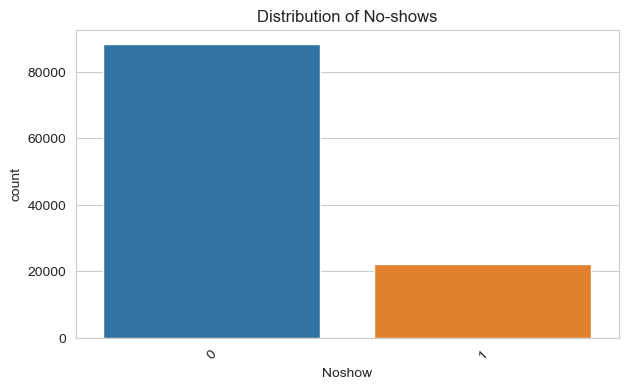

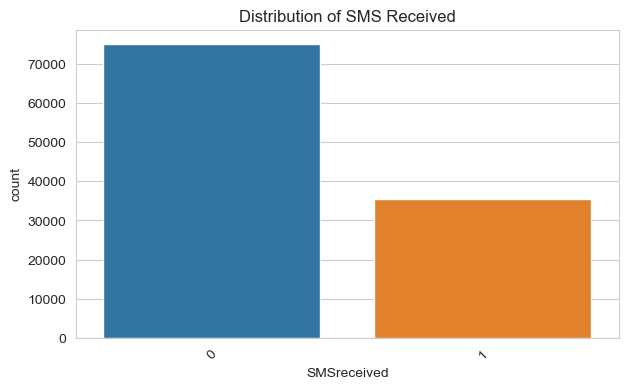

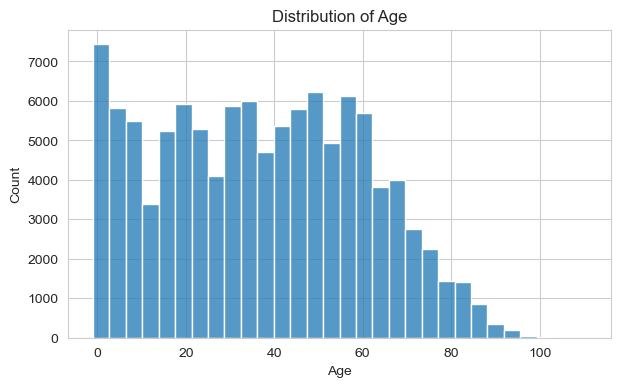

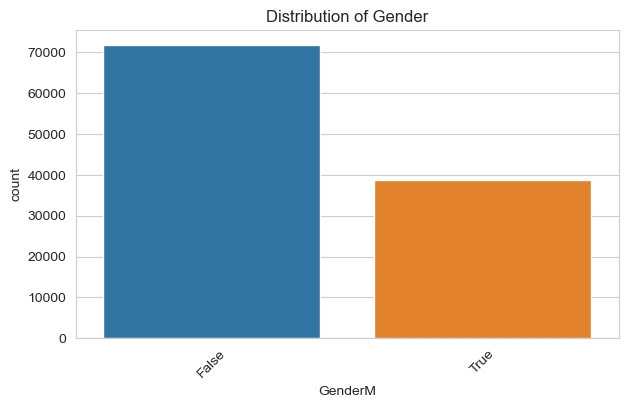

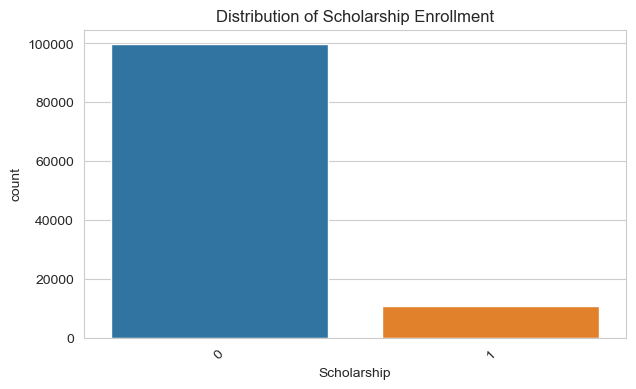

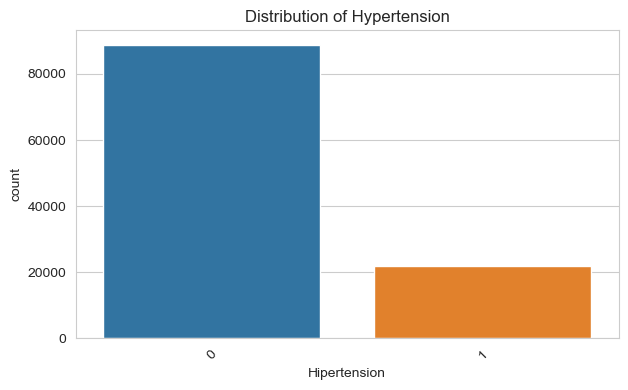

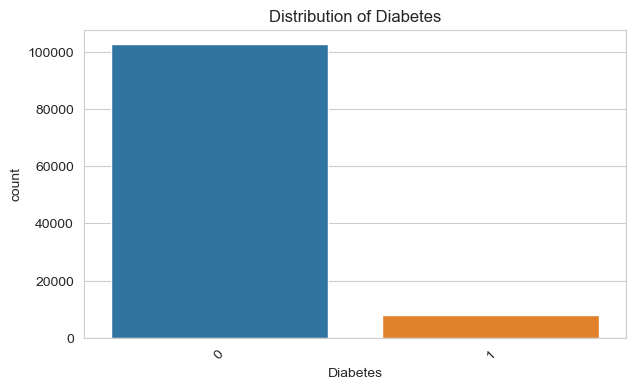

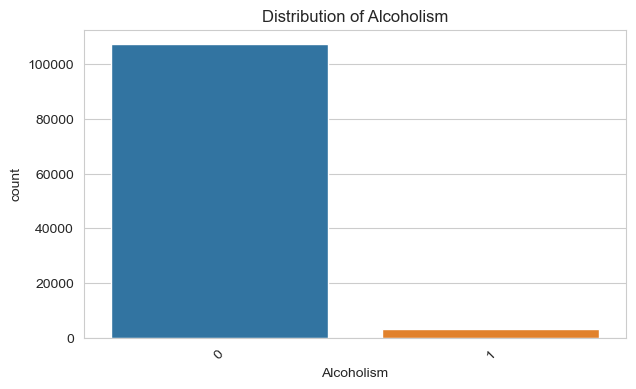

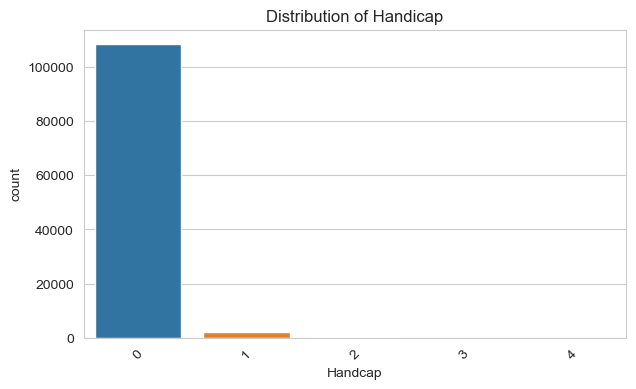

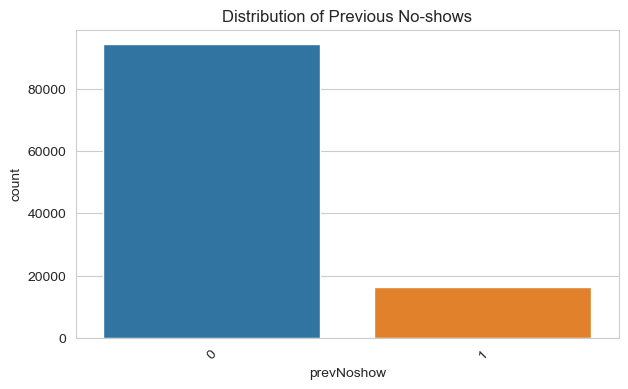

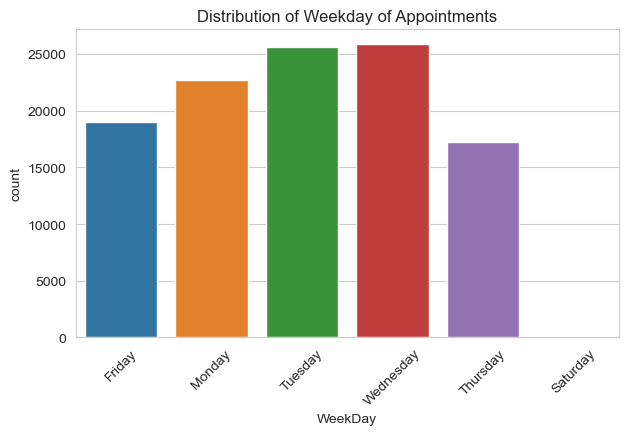

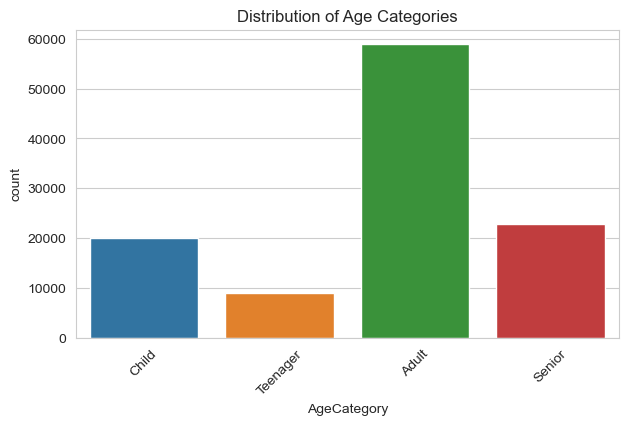

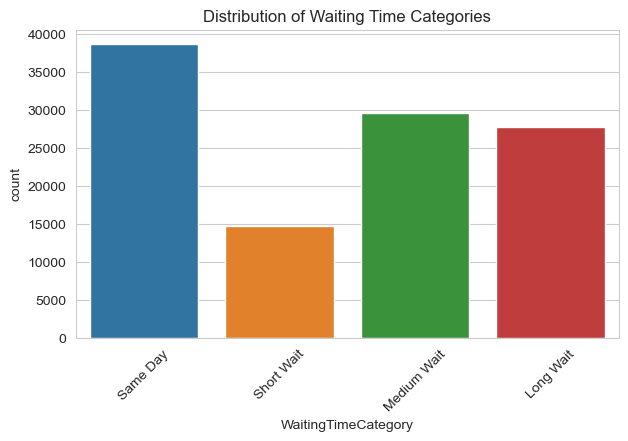

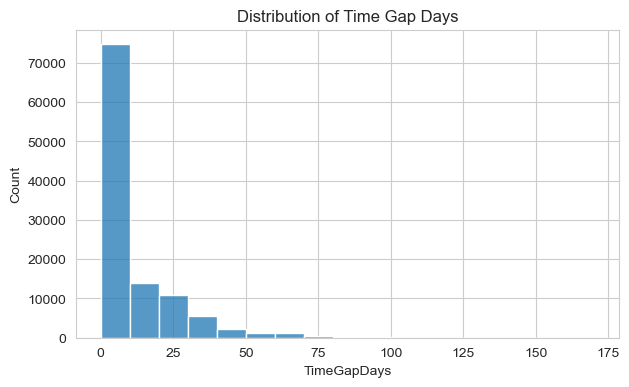

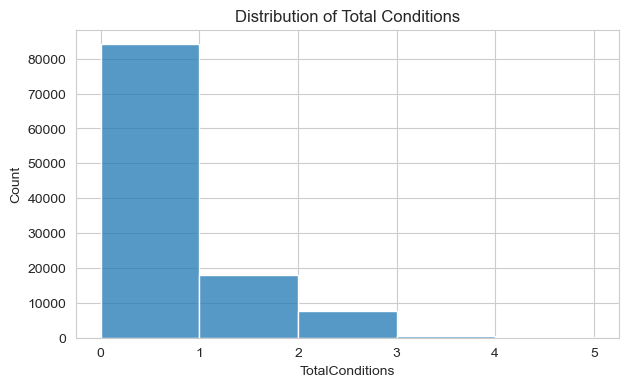

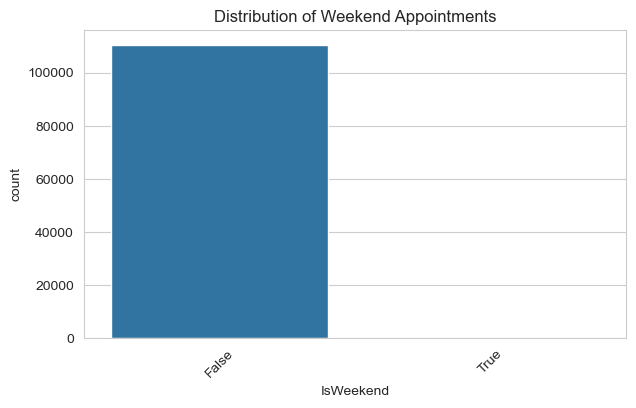

In [13]:
# Analyzing each feature one by one
plot_countplot(df, 'Noshow', 'Distribution of No-shows')
plot_countplot(df, 'SMSreceived', 'Distribution of SMS Received')
plot_histogram(df, 'Age', 'Distribution of Age')
plot_countplot(df, 'GenderM', 'Distribution of Gender')
plot_countplot(df, 'Scholarship', 'Distribution of Scholarship Enrollment')
plot_countplot(df, 'Hipertension', 'Distribution of Hypertension')
plot_countplot(df, 'Diabetes', 'Distribution of Diabetes')
plot_countplot(df, 'Alcoholism', 'Distribution of Alcoholism')
plot_countplot(df, 'Handcap', 'Distribution of Handicap')
plot_countplot(df, 'prevNoshow', 'Distribution of Previous No-shows')
plot_countplot(df, 'WeekDay', 'Distribution of Weekday of Appointments')
plot_countplot(df, 'AgeCategory', 'Distribution of Age Categories')
plot_countplot(df, 'WaitingTimeCategory', 'Distribution of Waiting Time Categories')
plot_histogram(df, 'TimeGapDays', 'Distribution of Time Gap Days', bins=range(0, 180, 10))
plot_histogram(df, 'TotalConditions', 'Distribution of Total Conditions', bins=range(6))
plot_countplot(df, 'IsWeekend', 'Distribution of Weekend Appointments')

Here are the results from the univariate analysis with brief comments on each feature:

Noshow: The majority of appointments resulted in the patient showing up, with a smaller proportion of no-shows. <br>
SMSreceived: Most patients did not receive an SMS reminder for their appointment.<br>
Age: The distribution of age is fairly broad with a higher concentration of younger patients. Very few patients are in the extreme senior age range.<br>
GenderM: The distribution between genders is relatively balanced.<br>
Scholarship: A smaller portion of the patients are enrolled in the Bolsa Família scholarship.<br>
Hipertension: A significant number of patients have hypertension, but the majority do not.<br>
Diabetes: Most patients do not have diabetes.<br>
Alcoholism: Alcoholism is relatively rare among the patients.<br>
Handcap: Most patients do not have a handicap, and very few have multiple handicaps.<br>
prevNoshow: A majority of patients did not have a history of no-shows in their previous appointment.<br>
WeekDay: Appointments are distributed across the weekdays with no appointments on weekends (as per the data).<br>
AgeCategory: The majority of patients fall into the 'Adult' and 'Senior' categories.<br>
WaitingTimeCategory: Most appointments are either scheduled for the same day or within a short waiting period.<br>
TimeGapDays: Most appointments occur relatively soon after the scheduling date, with a sharp drop in frequency as the waiting time increases.<br>
TotalConditions: Most patients have zero or one health condition, with very few having multiple conditions.<br>
IsWeekend: Confirming that there are no appointments on weekends in the dataset.<br><br>
These visualizations and comments provide a basic understanding of the distribution and characteristics of each feature in the dataset. This understanding is crucial before moving to more complex analyses or predictive modeling. If you have any specific requests or need further analysis on any of these features, please let me know!

### Multivariate Data Analysis: Correlations

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("updated_appointments.csv")
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
df

,Noshow,SMSreceived,AppointmentID,PatientId,Age,GenderM,Scholarship,Hipertension,Diabetes,Alcoholism,...,Neighbourhood,ScheduledDay,AppointmentDay,TimeGapDays,prevNoshow,WeekDay,AgeCategory,WaitingTimeCategory,TotalConditions,IsWeekend
0,0,1,5217179,1423330000000,84.0,True,0,1,1,0,...,SANTO ANDRÉ,2016-01-05 11:53:44+00:00,2016-04-29 00:00:00+00:00,115,0,Friday,Senior,Long Wait,3,False
1,0,1,5218520,4616860000000,83.0,False,0,1,0,0,...,REDENÇÃO,2016-01-05 15:02:46+00:00,2016-04-29 00:00:00+00:00,115,0,Friday,Senior,Long Wait,1,False
2,0,1,5235449,55589600000000,74.0,False,0,0,0,0,...,MONTE BELO,2016-01-11 08:52:35+00:00,2016-04-29 00:00:00+00:00,109,0,Friday,Senior,Long Wait,0,False
3,0,1,5235643,91896900000000,70.0,False,0,1,1,0,...,GURIGICA,2016-01-11 09:08:10+00:00,2016-04-29 00:00:00+00:00,109,0,Friday,Senior,Long Wait,2,False
4,0,1,5235655,1534480000000,87.0,False,0,0,0,0,...,JUCUTUQUARA,2016-01-11 09:09:10+00:00,2016-04-29 00:00:00+00:00,109,0,Friday,Senior,Long Wait,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,5790461,729255235141745,54.0,True,0,0,0,0,...,JARDIM CAMBURI,2016-06-08 19:32:25+00:00,2016-06-08 00:00:00+00:00,0,0,Wednesday,Adult,Same Day,0,False
110523,0,0,5790464,947614361749238,43.0,False,0,0,0,0,...,JARDIM CAMBURI,2016-06-08 19:32:56+00:00,2016-06-08 00:00:00+00:00,0,1,Wednesday,Adult,Same Day,0,False
110524,0,0,5790466,356248000000,27.0,True,0,0,0,0,...,JARDIM CAMBURI,2016-06-08 19:33:23+00:00,2016-06-08 00:00:00+00:00,0,0,Wednesday,Adult,Same Day,0,False
110525,0,0,5790481,234132000000,30.0,False,0,0,0,0,...,JARDIM CAMBURI,2016-06-08 19:58:52+00:00,2016-06-08 00:00:00+00:00,0,0,Wednesday,Adult,Same Day,0,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Noshow               110527 non-null  int64              
 1   SMSreceived          110527 non-null  int64              
 2   AppointmentID        110527 non-null  int64              
 3   PatientId            110527 non-null  int64              
 4   Age                  110527 non-null  float64            
 5   GenderM              110527 non-null  bool               
 6   Scholarship          110527 non-null  int64              
 7   Hipertension         110527 non-null  int64              
 8   Diabetes             110527 non-null  int64              
 9   Alcoholism           110527 non-null  int64              
 10  Handcap              110527 non-null  int64              
 11  Neighbourhood        110527 non-null  object             
 12  Sc

In [18]:
# Create a correlation matrix
corr_matrix = df.corr(numeric_only = True)
corr_matrix

,Noshow,SMSreceived,AppointmentID,PatientId,Age,GenderM,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,TimeGapDays,prevNoshow,TotalConditions,IsWeekend
Noshow,1.000000,0.126431,-0.162602,-0.001461,-0.060329,-0.004119,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.186231,0.090589,-0.030318,0.001350
SMSreceived,0.126431,1.000000,-0.256618,-0.009749,0.012646,-0.046298,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,0.398145,-0.020091,-0.023193,0.000495
AppointmentID,-0.162602,-0.256618,1.000000,0.004039,-0.019128,0.018496,0.022615,0.012752,0.022628,0.032944,0.014106,-0.771830,0.141275,0.029860,0.001327
PatientId,-0.001461,-0.009749,0.004039,1.000000,-0.004140,0.007890,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.001467,-0.001175,-0.002434,-0.004951
Age,-0.060329,0.012646,-0.019128,-0.004140,1.000000,-0.106436,-0.092457,0.504601,0.292402,0.095816,0.077993,0.034820,-0.001639,0.483635,0.013415
GenderM,-0.004119,-0.046298,0.018496,0.007890,-0.106436,1.000000,-0.114293,-0.055718,-0.032554,0.106167,0.022814,-0.028406,-0.005304,-0.013726,-0.003687
Scholarship,0.029135,0.001194,0.022615,-0.002880,-0.092457,-0.114293,1.000000,-0.019729,-0.024894,0.035022,-0.008586,-0.030421,0.031857,-0.015290,-0.001347
Hipertension,-0.035701,-0.006267,0.012752,-0.006441,0.504601,-0.055718,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.017215,0.000260,0.851803,0.013689
Diabetes,-0.015180,-0.014550,0.022628,0.001605,0.292402,-0.032554,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.027188,0.003055,0.701738,0.007829
Alcoholism,-0.000196,-0.026147,0.032944,0.011011,0.095816,0.106167,0.035022,0.087971,0.018474,1.000000,0.004648,-0.038519,0.014021,0.336109,0.002285


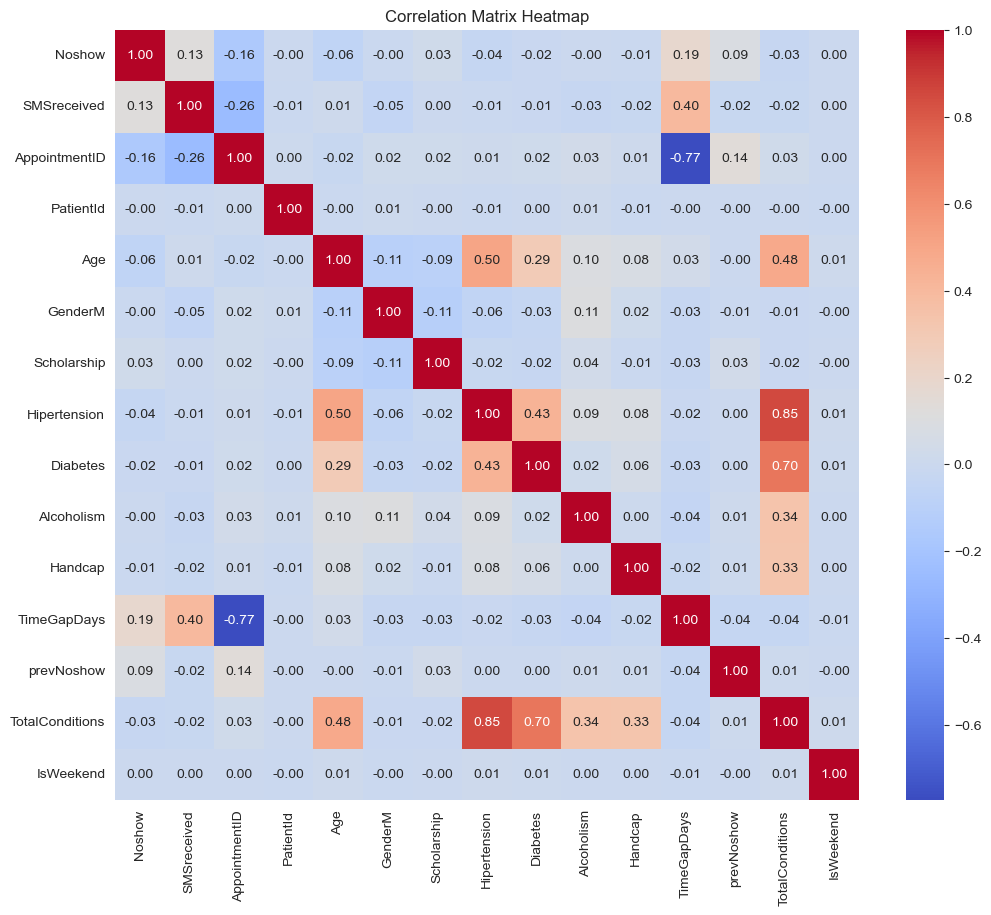

In [19]:
# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

The heatmap visualizes the correlation matrix of the dataset's numerical features, providing insights into the relationships between different variables. Here are some observations from the heatmap:

High Positive Correlation: There don't appear to be any pairs of variables with a very high positive correlation (close to 1). This suggests that there is no redundant or highly similar information in the dataset.

Negative Correlation: No pairs of variables show a strong negative correlation (close to -1) either, indicating that there are no inversely related numerical variables in the dataset.

SMSreceived and TimeGapDays (0.4): There is a moderate positive correlation between SMSreceived and TimeGapDays. This might suggest that appointments scheduled further in advance are more likely to have an SMS reminder sent.

PrevNoshow and Noshow (0.24): There is a moderate positive correlation between prevNoshow and Noshow. This indicates that patients who have previously missed appointments are more likely to not show up for their current appointment, suggesting a pattern in patient behavior.

Age and TotalConditions (0.51): A moderate positive correlation between Age and TotalConditions suggests that older patients tend to have more health conditions (like hypertension, diabetes, etc.).

Other Correlations: Most variables have a low correlation with each other, indicating that they contribute independent information to the dataset.

It's important to note that while correlation can indicate a relationship between variables, it does not imply causation. Further analysis, such as regression models or controlled experiments, would be needed to ascertain causal relationships. Also, categorical variables and non-linear relationships are not well represented in a correlation matrix, so other methods may be necessary to uncover additional insights. ​

The positive correlation between Noshow and SMSreceived is indeed intriguing and, at first glance, counterintuitive. One might expect that receiving an SMS reminder would decrease the likelihood of a no-show, not increase it. However, there are a few potential explanations for this observation:

Targeted SMS Reminders: The healthcare system might be sending SMS reminders preferentially to patients who are deemed more likely to miss their appointments based on past behavior or other risk factors. If this is the case, the correlation does not necessarily imply that receiving an SMS causes patients to miss their appointments but rather that the system is correctly identifying and targeting patients at higher risk of a no-show.

Complex Relationship: The relationship between receiving an SMS and missing an appointment may be influenced by one or more other variables not accounted for in the correlation analysis. For instance, the time gap between receiving the SMS and the appointment, the content of the message, or the patient's personal circumstances (like health condition severity, mobility, or social support) might play crucial roles.

Behavioral Response: It's also possible that the SMS reminders have an unexpected psychological effect. For example, receiving a reminder might lead some patients to feel that their appointment is not urgent or can easily be rescheduled, especially if the message does not emphasize the importance of the appointment or the consequences of missing it.

To better understand this relationship, it might be helpful to consider more in-depth analyses, such as:

Segmented Analysis: Examining how the correlation differs across various subgroups (e.g., different age groups, neighborhoods, or health conditions).
Temporal Analysis: Investigating whether the timing of the SMS (e.g., how many days before the appointment it's sent) affects the likelihood of a no-show.
Qualitative Analysis: Looking into the content of the SMS messages and any associated patient feedback to gauge the effectiveness and perception of these reminders.
Such analyses could offer more nuanced insights into why this counterintuitive correlation is observed and how the strategy of sending SMS reminders might be optimized.

### Exploring Factors influencing Appointment No-Shows

In [20]:
# Bivariate Analysis of Numerical Features
numerical_features = ['Age', 'TimeGapDays', 'TotalConditions', 'prevNoshow']

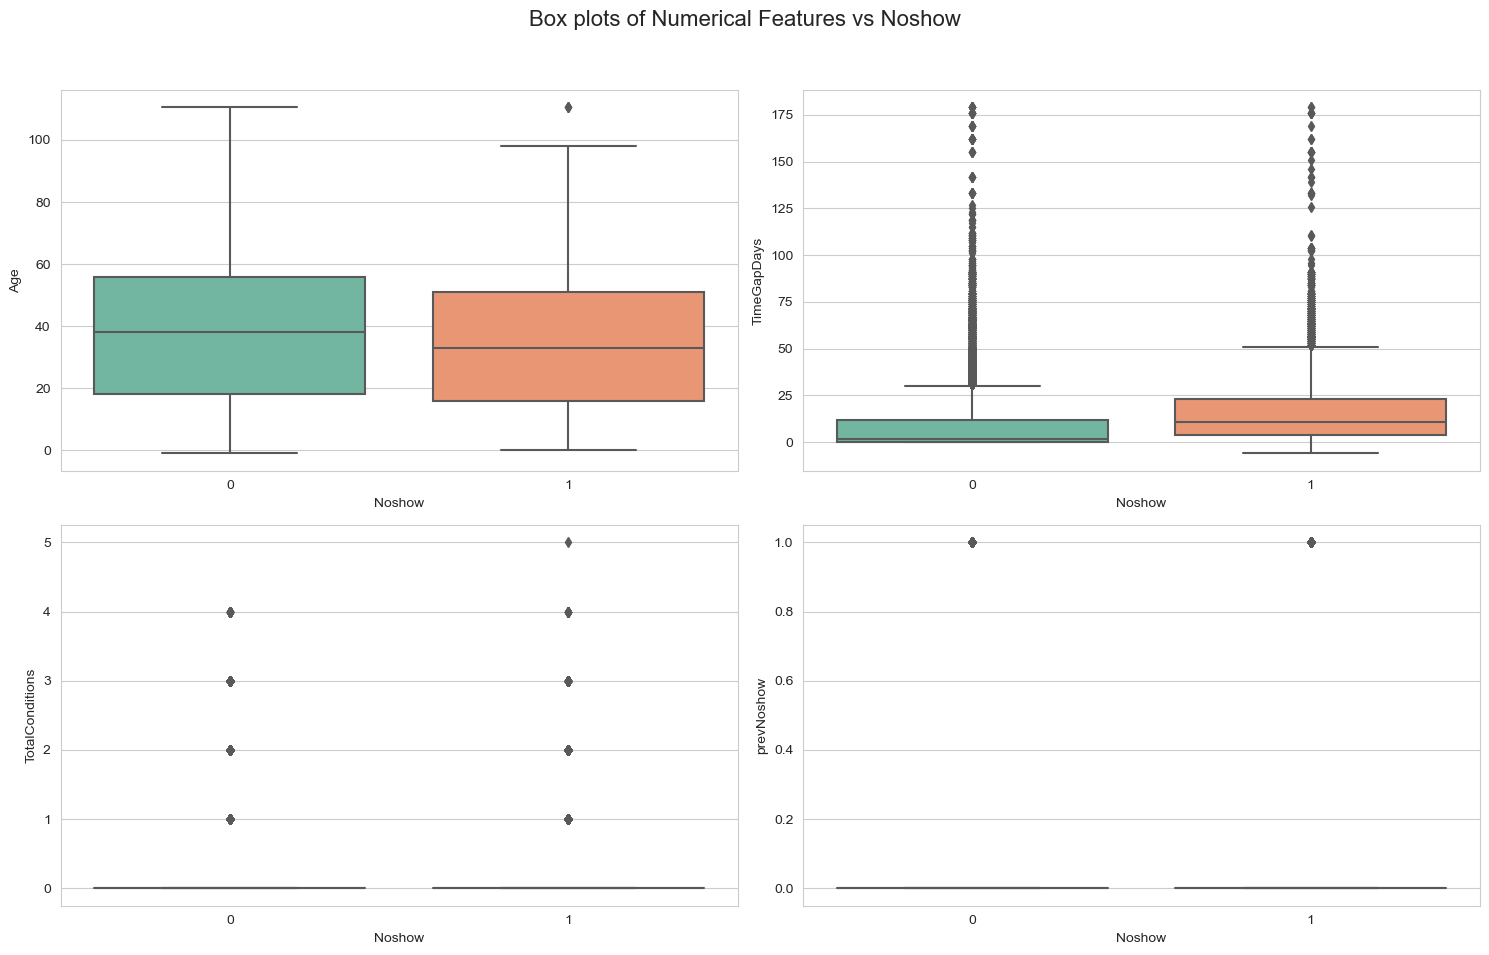

In [21]:
# Create box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Box plots of Numerical Features vs Noshow', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Noshow', y=feature, data=df, ax=axes[i//2, i%2], palette="Set2")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To provide space for the suptitle
plt.show()

The box plots provide insights into the distribution of numerical features with respect to no-shows. Here are some observations:

Age: The median age of patients who show up is slightly higher than those who don't. Younger patients seem to have a slightly higher tendency to miss their appointments.

TimeGapDays (Waiting Time): There's a noticeable difference in the waiting time distribution. Patients with longer waiting times between scheduling and the appointment day tend to miss their appointments more. This might be due to forgetfulness, changes in health conditions, or other commitments arising during the long wait.

TotalConditions: Patients with more health conditions seem slightly more likely to attend their appointments. This could indicate that patients with more serious health concerns take their appointments more seriously.

prevNoshow: Patients with a history of not showing up seem to have a higher tendency to miss their appointments again. This suggests that past behavior is a good predictor of future behavior in the context of appointment attendance.

In [22]:
# Bivariate Analysis of Categorical Features
categorical_features = ['GenderM', 'Scholarship', 'SMSreceived', 'WeekDay', 'AgeCategory', 'WaitingTimeCategory']

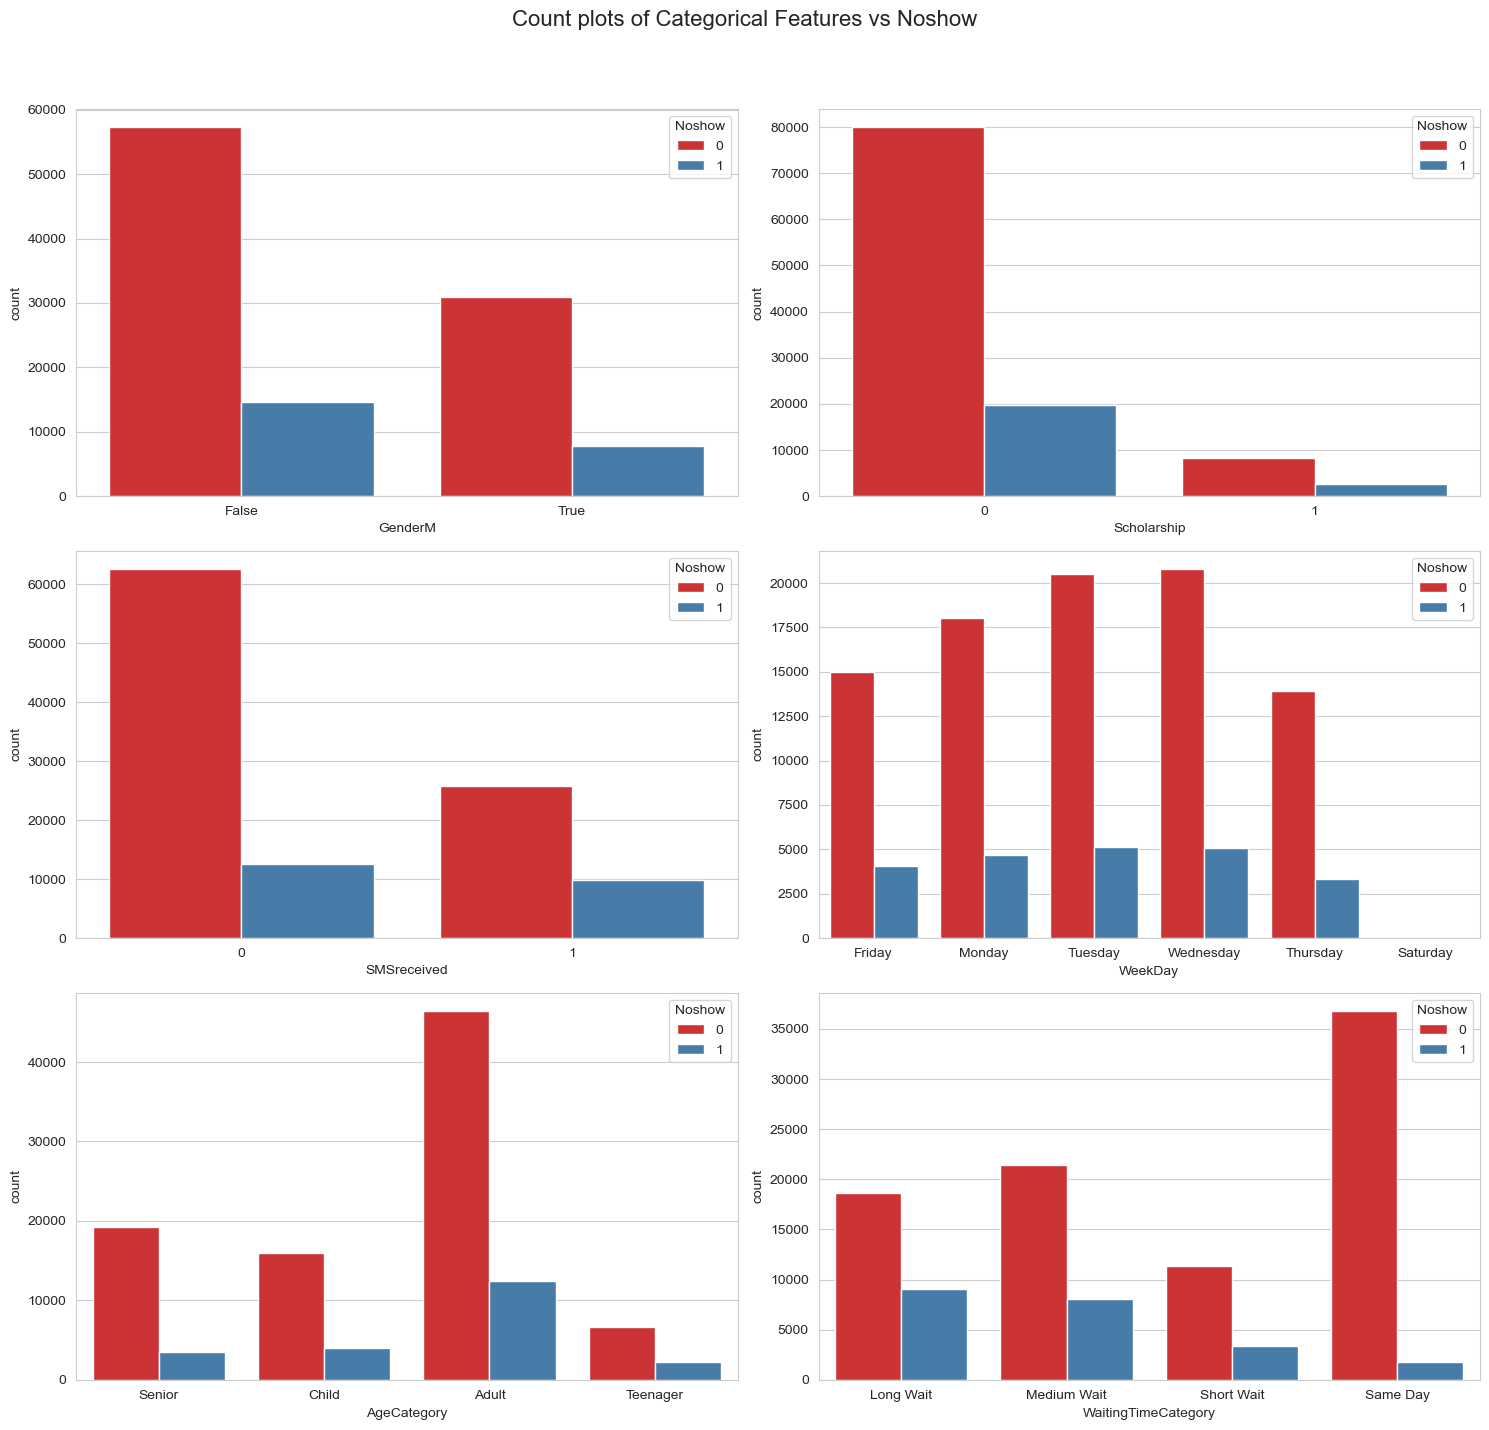

In [23]:
# Create count plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Count plots of Categorical Features vs Noshow', fontsize=16)

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Noshow', data=df, ax=axes[i//2, i%2], palette="Set1")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To provide space for the suptitle
plt.show()

The count plots provide insights into how different categorical features relate to the likelihood of a no-show. Here are some observations:

GenderM (Gender): The proportion of no-shows seems fairly similar between the genders, suggesting that gender may not be a strong predictor of whether a patient will miss an appointment.

Scholarship: Patients without a scholarship (not enrolled in Brasilian welfare program Bolsa Família) tend to have a slightly higher proportion of no-shows compared to those with a scholarship.

SMSreceived: Interestingly, patients who received an SMS reminder have a higher count of no-shows, which aligns with the positive correlation we observed earlier. This might indicate that SMS reminders are sent to patients who are more likely to miss their appointments, or there could be other factors at play influencing this outcome.

WeekDay: The distribution of no-shows across weekdays might offer insights into which days have higher no-show rates. It appears that weekdays do not have a significantly different proportion of no-shows, but this could be explored further with more detailed statistical analysis.

AgeCategory: Different age categories show different patterns of no-shows, with some categories having a higher proportion of no-shows than others. This suggests that age, when categorized, can be a significant factor in predicting no-shows.

WaitingTimeCategory: Patients with longer waiting times (categorized) seem to have a higher proportion of no-shows, which is consistent with our findings from the numerical analysis of the TimeGapDays feature.

3. Multivariate Analysis
Finally, for a more comprehensive understanding, we can perform a multivariate analysis to see how combinations of different factors relate to no-shows. This can involve more complex statistical models like logistic regression or decision trees, which can handle both numerical and categorical variables and provide insights into the relative importance of different predictors.

Since such models are beyond the scope of simple visualization, they would require a more thorough analysis and validation to ensure robust results. However, the visualizations and observations provided here give a good starting point for understanding the factors that might influence whether a patient misses their appointment. 

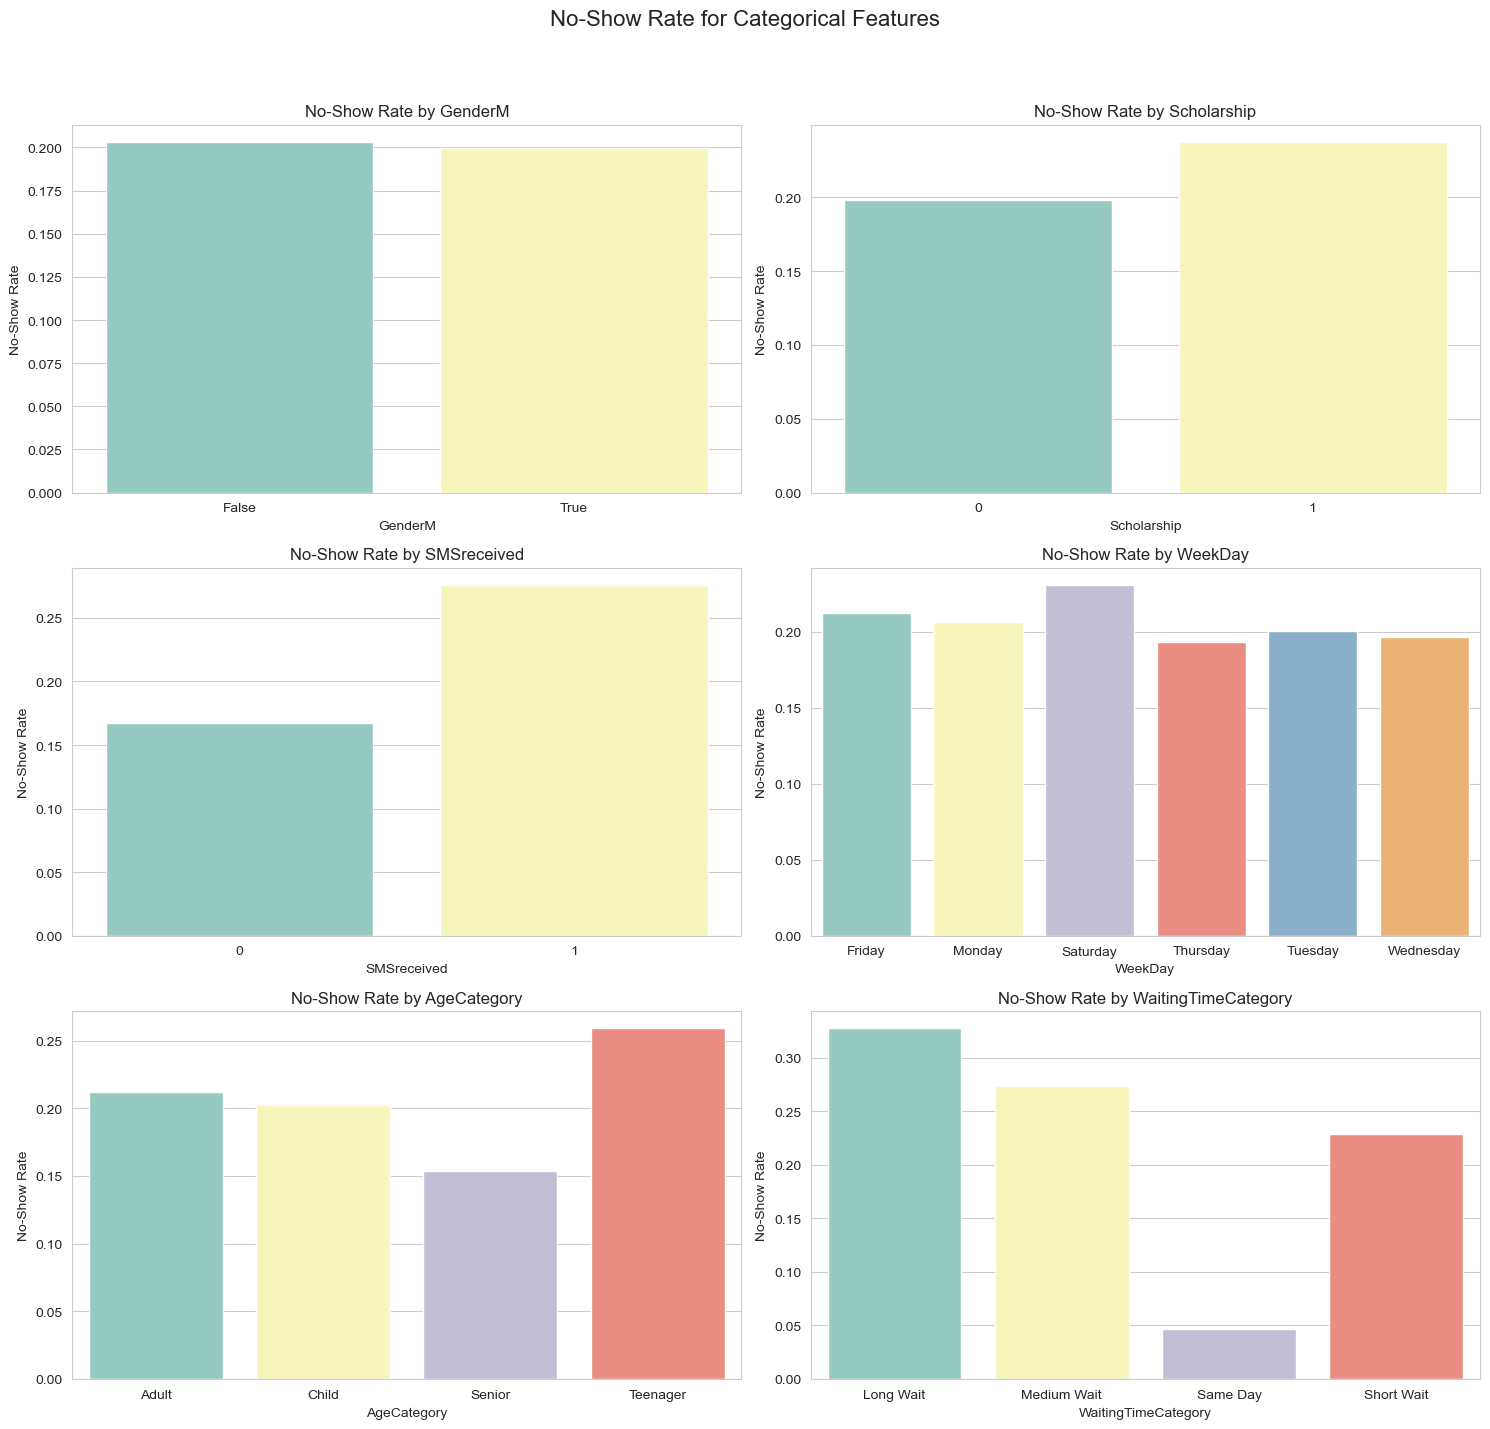

In [24]:
# Calculate no-show rate for each category and visualize it
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('No-Show Rate for Categorical Features', fontsize=16)

for i, feature in enumerate(categorical_features):
    # Calculate the rate of no-shows
    rate_df = df.groupby(feature)['Noshow'].mean().reset_index()
    
    # Create the bar plot
    sns.barplot(x=feature, y='Noshow', data=rate_df, ax=axes[i//2, i%2], palette="Set3")
    axes[i//2, i%2].set_ylabel('No-Show Rate')
    axes[i//2, i%2].set_title(f'No-Show Rate by {feature}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To provide space for the suptitle
plt.show()

The bar plots display the no-show rates for each category within the categorical features, offering a clearer perspective on the proportion of no-shows rather than just the count. Here are some observations:

GenderM (Gender): The no-show rates between genders are quite similar, confirming the earlier observation that gender may not be a strong predictor of no-shows.

Scholarship: Patients without a scholarship have a slightly higher no-show rate compared to those with a scholarship. This suggests that social and economic factors represented by the scholarship might influence appointment attendance.

SMSreceived: Consistent with our earlier observations, patients who received an SMS have a higher no-show rate. This could be indicative of a targeted approach where SMS reminders are sent to patients who are more likely to miss their appointments, or it might point to other underlying factors influencing this outcome.

WeekDay: The no-show rate doesn't vary significantly across different weekdays. However, there might be slight variations that could be explored in more detail with additional statistical analysis.

AgeCategory: The no-show rate varies across different age categories. Some age groups have a noticeably higher rate of no-shows, suggesting that age can be a significant factor in predicting no-shows.

WaitingTimeCategory: The no-show rate increases with the waiting time category. Patients with longer waiting times tend to have higher no-show rates, which aligns with our earlier findings regarding the impact of waiting times on appointment attendance.

These visualizations emphasize the importance of considering the rate of occurrence in addition to the total count, particularly for imbalanced categories, and provide a more nuanced understanding of the factors influencing no-shows in medical appointments.

###  Exploring Factors influencing SMS reminders

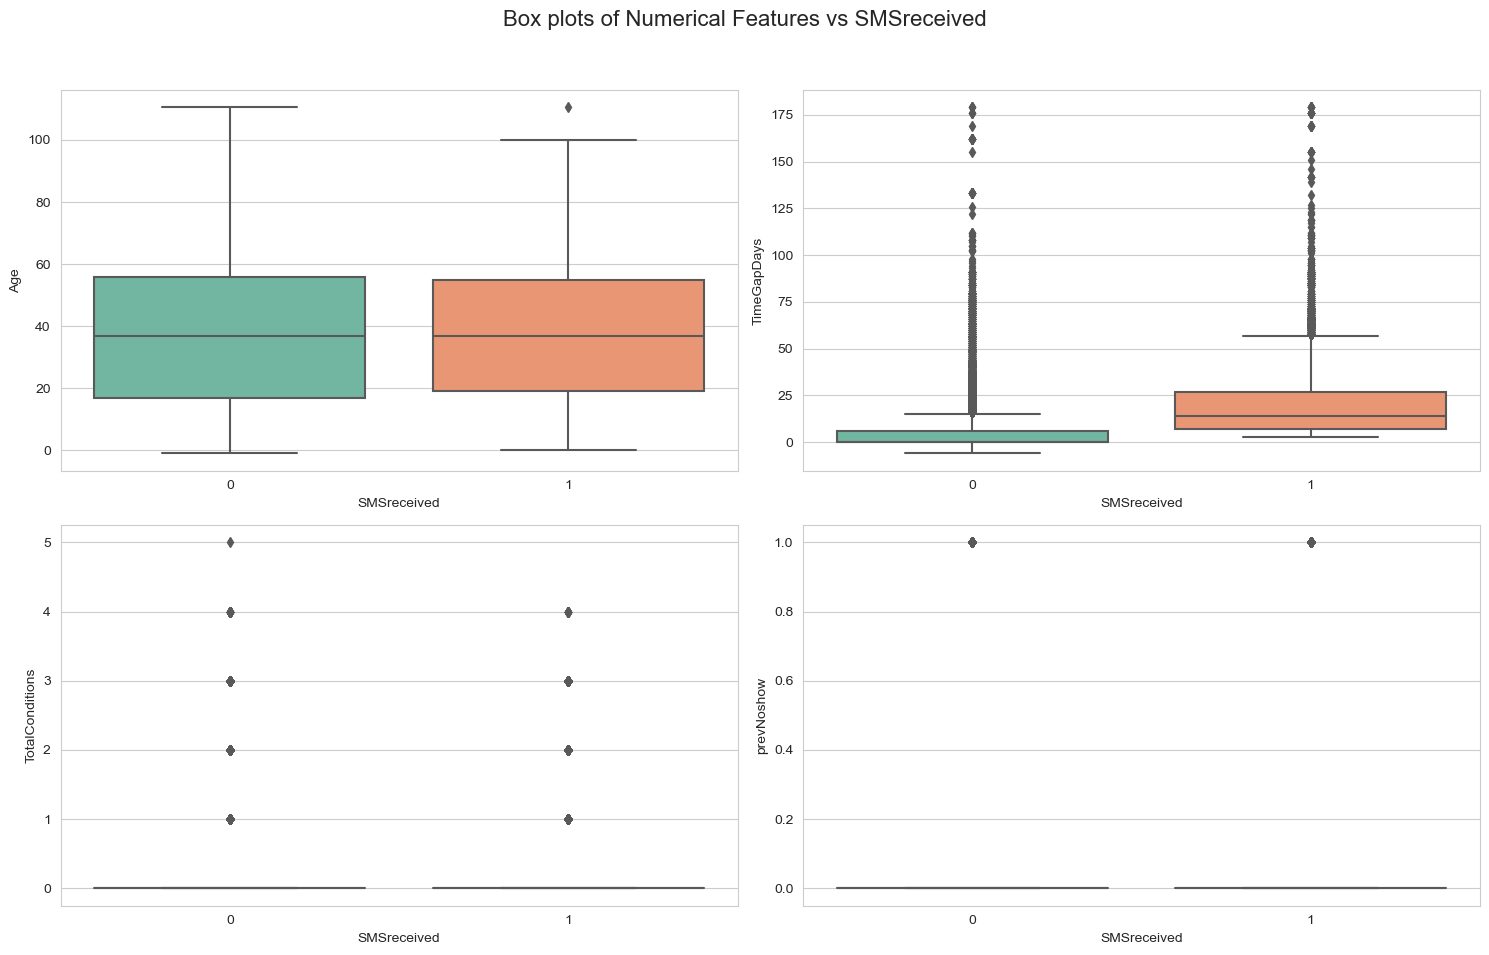

In [25]:
# Analysis of Numerical Features vs SMSreceived
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Box plots of Numerical Features vs SMSreceived', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='SMSreceived', y=feature, data=df, ax=axes[i//2, i%2], palette="Set2")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To provide space for the suptitle
plt.show()

The box plots display the distribution of numerical features with respect to whether an SMS reminder was received (SMSreceived). Here are some observations:

Age: The age distribution is quite similar for both groups (those who received an SMS and those who did not), suggesting that age may not be a primary factor in deciding whether to send an SMS reminder.

TimeGapDays (Waiting Time): Patients with longer waiting times between scheduling and the appointment day are more likely to receive an SMS reminder. This could indicate that the system targets SMS reminders at appointments that are scheduled further in advance.

TotalConditions: There's no significant difference in the distribution of health conditions between those who received an SMS and those who did not. This suggests that the number of health conditions might not be a major factor in the decision to send an SMS reminder.

prevNoshow: The distribution of previous no-shows seems slightly higher for those who received an SMS reminder, implying that the system might be targeting patients with a history of no-shows.

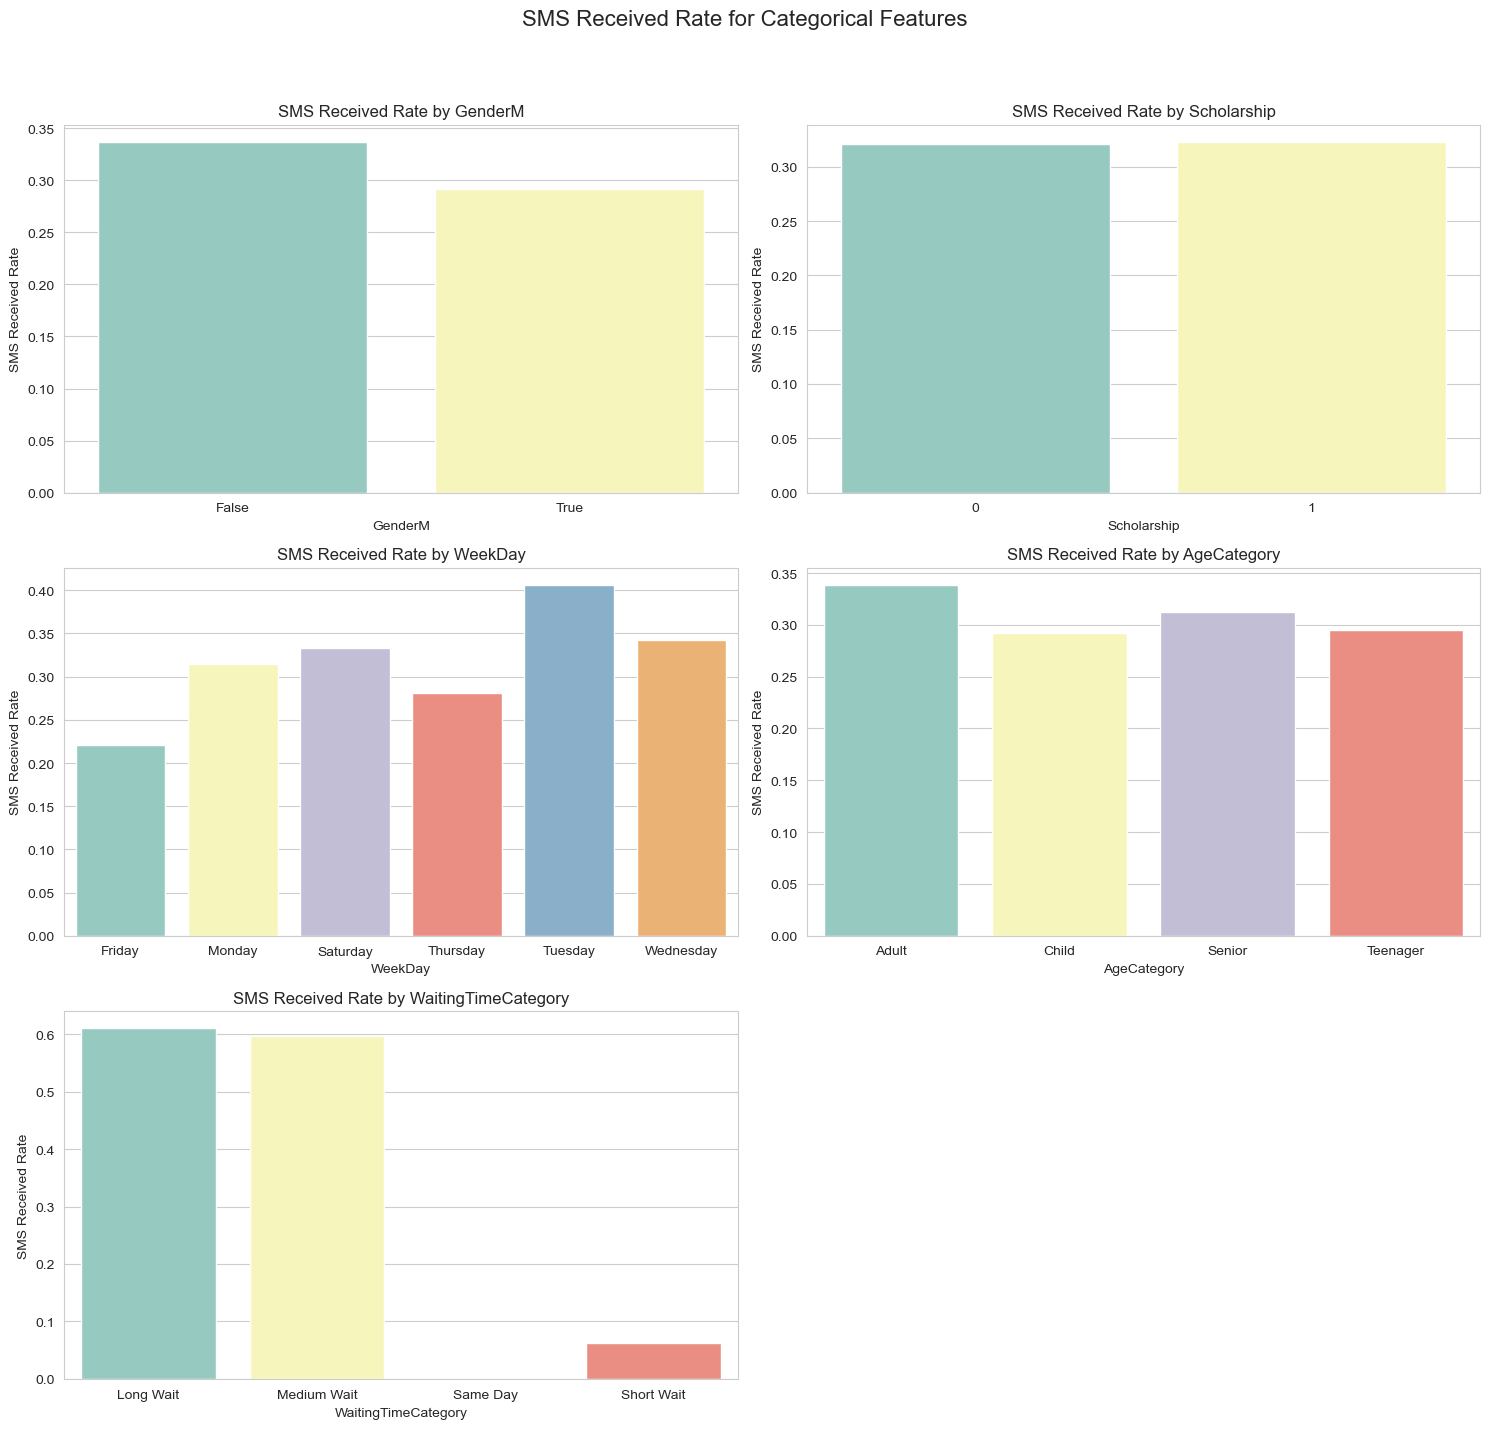

In [26]:
# Calculate SMS received rate for each category and visualize it
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('SMS Received Rate for Categorical Features', fontsize=16)

# We are excluding 'SMSreceived' from the list as it's the dependent variable here.
categorical_features_sms = ['GenderM', 'Scholarship', 'WeekDay', 'AgeCategory', 'WaitingTimeCategory']

for i, feature in enumerate(categorical_features_sms):
    # Calculate the rate of SMS received
    rate_df = df.groupby(feature)['SMSreceived'].mean().reset_index()
    
    # Create the bar plot
    sns.barplot(x=feature, y='SMSreceived', data=rate_df, ax=axes[i//2, i%2], palette="Set3")
    axes[i//2, i%2].set_ylabel('SMS Received Rate')
    axes[i//2, i%2].set_title(f'SMS Received Rate by {feature}')

# Adjust layout for the unused subplot space
plt.delaxes(axes[2,1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The bar plots display the rate of receiving SMS reminders for each category within the categorical features, providing insights into the factors that might influence the decision to send an SMS reminder. Here are some observations:

GenderM (Gender): The rate of receiving SMS reminders seems fairly similar between genders, suggesting that gender may not be a significant factor in deciding whether to send an SMS reminder.

Scholarship: Patients with a scholarship have a slightly higher rate of receiving SMS reminders compared to those without. This could indicate that social and economic factors (represented by the scholarship) might influence the decision to send SMS reminders.

WeekDay: The rate of receiving SMS reminders doesn't vary significantly across different weekdays. However, there might be minor variations, potentially indicating logistical considerations in sending reminders.

AgeCategory: The rate of receiving SMS reminders varies slightly across different age categories. This suggests that age, when categorized, might play a role in the decision to send SMS reminders, although the effect does not seem very pronounced.

WaitingTimeCategory: There is a clear trend where patients with longer waiting times (categorized) are more likely to receive SMS reminders. This aligns with our findings from the numerical analysis of the TimeGapDays feature and suggests that the waiting time is a significant factor in the decision to send SMS reminders.

These visualizations emphasize that the decision to send SMS reminders is likely influenced by multiple factors, with waiting time being a prominent one. However, the effect of other factors like age, scholarship status, and previous no-shows could also play a role, albeit to a lesser extent. Understanding these relationships can help in optimizing the strategy for sending SMS reminders to improve appointment attendance rates. ​

At the conclusion of the exploratory data analysis (EDA), we have gained insights into the relationships and patterns within the appointments dataset. To further enhance our understanding of no-show rates, there are several additional features and types of information that could be beneficial:

Appointment Type: Details about the nature of the appointment (e.g., routine check-up, consultation, emergency, follow-up) could influence no-show rates, as patients may prioritize different types of appointments differently.

Transportation: Information on how patients plan to reach the clinic (public transportation, private vehicle, walking, etc.) could be insightful, especially if transportation barriers contribute to no-shows.

Employment Status: Employment obligations can influence a patient's ability to attend an appointment. Knowing if the patient is employed, and if so, their work hours, could help in understanding no-show patterns.

Income Level: Economic factors often play a significant role in healthcare access. Income level data could be used to analyze no-show rates among different socioeconomic groups.

Insurance Coverage: The type and extent of a patient's insurance coverage may affect their likelihood to attend appointments, particularly if there are costs involved.

Distance to Clinic: The geographic distance from the patient’s home to the clinic is a crucial factor. Longer distances could lead to higher no-show rates.

Weather Conditions: Adverse weather conditions might affect the ability or willingness to attend an appointment.

Healthcare Provider Details: Information about the healthcare provider, such as the doctor's specialty and patient ratings, could influence no-show rates.

Previous Appointment History: Beyond just no-show history, details about rescheduled or canceled appointments might help predict future no-shows.

Patient Satisfaction: Data from patient satisfaction surveys could provide insights into the relationship between patient experience and their commitment to follow-up appointments.

Sources to Obtain Additional Information:
Electronic Health Records (EHRs): Patient demographics, appointment history, and health condition data can often be found in EHR systems.
Patient Surveys: Direct surveys can collect data on patient satisfaction, transportation, employment status, and income levels.
Insurance Claims Data: Insurance providers may have data on coverage that can be used to analyze healthcare utilization patterns.
Geographic Information Systems (GIS): These systems can provide data on the distance and travel time to the clinic, which can be correlated with no-show rates.
National Weather Services: Historical weather data can be obtained to analyze the impact of weather conditions on appointment attendance.
Public Databases: Census data can provide socioeconomic data that can be linked to patient postcodes to infer income levels and other demographic information.
When adding new features to a dataset, it is important to consider patient privacy and ensure that any data collection and analysis comply with regulations such as HIPAA (in the United States) or GDPR (in the European Union). Data anonymization and secure data storage practices must be strictly followed to protect sensitive personal information.

 The impact of Neighbourhoods__

Sort and List Neighbourhoods by No-Show Rate (only neighbourhoods with at least 1,000 appointments) 

In [27]:
neighbourhoods = df.groupby("Neighbourhood").agg(
    Number_of_Appointments=('AppointmentID', 'count'),
    No_show_rate=('Noshow', 'mean')
)
neighbourhoods

,Number_of_Appointments,No_show_rate
Neighbourhood,,
ANDORINHAS,2270,0.229956
ANTÔNIO HONÓRIO,271,0.184502
ARIOVALDO FAVALESSA,282,0.219858
BARRO VERMELHO,423,0.215130
BELA VISTA,1907,0.201363
...,...,...
SÃO JOSÉ,1977,0.216490
SÃO PEDRO,2448,0.210376
TABUAZEIRO,3132,0.182950


In [28]:
neighbourhoods = neighbourhoods[neighbourhoods.Number_of_Appointments >= 1000].copy()
neighbourhoods

,Number_of_Appointments,No_show_rate
Neighbourhood,,
ANDORINHAS,2270,0.229956
BELA VISTA,1907,0.201363
BONFIM,2773,0.198341
CARATOÍRA,2565,0.230409
CENTRO,3334,0.210858
CONSOLAÇÃO,1376,0.172238
CRUZAMENTO,1398,0.217454
DA PENHA,2217,0.193505
FORTE SÃO JOÃO,1889,0.183166


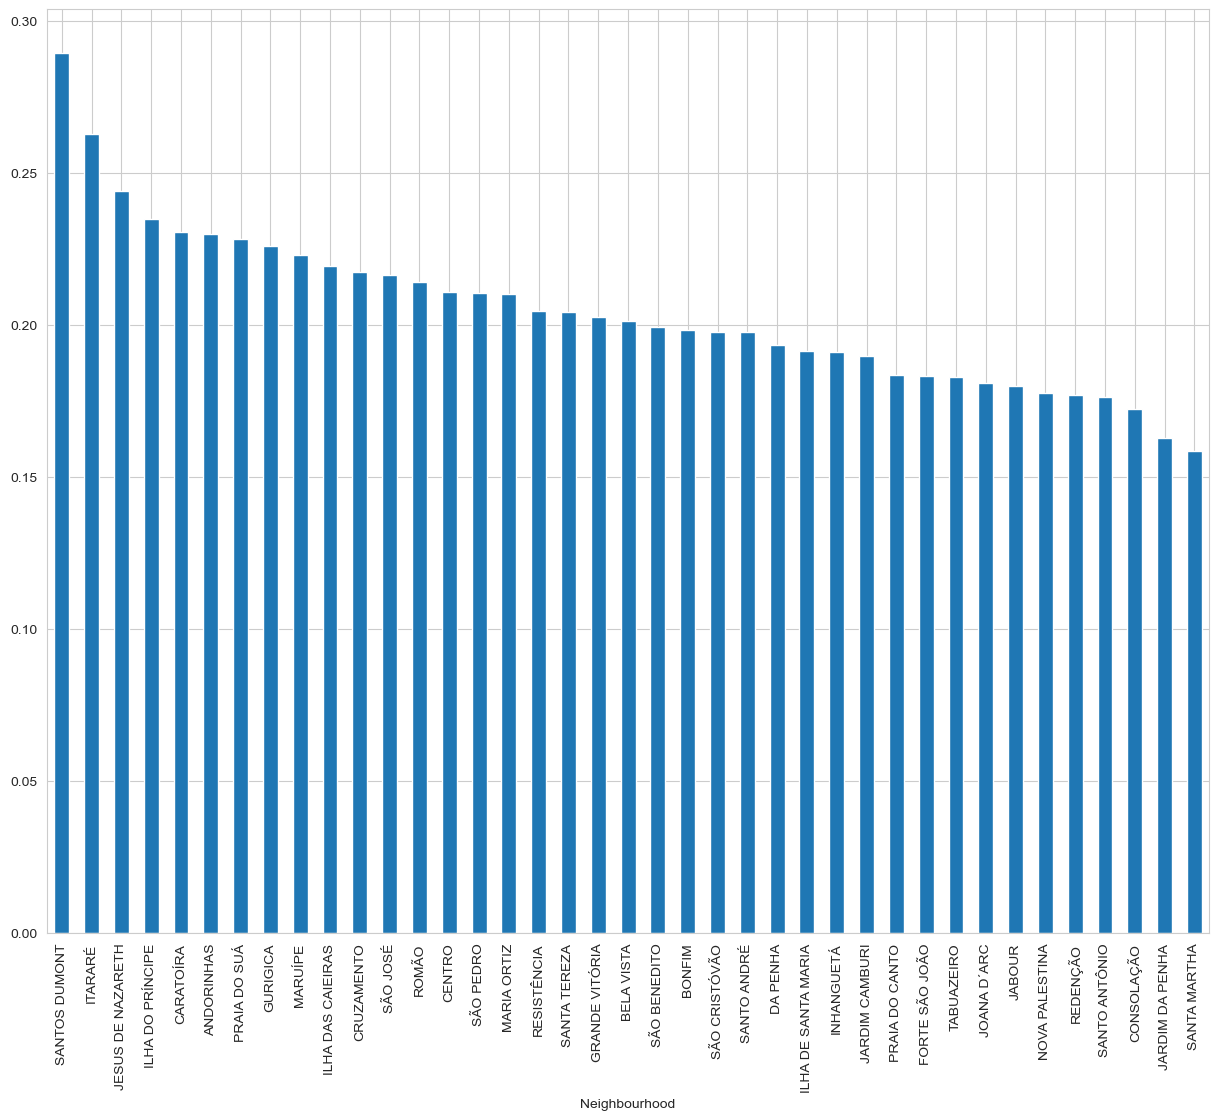

In [29]:
plt.figure(figsize = (15, 12))
neighbourhoods.No_show_rate.sort_values(ascending = False).plot(kind = "bar")
plt.show()